<a href="https://colab.research.google.com/github/vi-sha-kha/Data_Analysis_Using_Python-_And_SQL/blob/main/Heart_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing and importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset

In [2]:
data=pd.read_csv('/content/Hearts.csv')
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


#number of rows and columns in the dataset

In [3]:
data.shape

(303, 15)

Checking and Handling missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [5]:
data.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [6]:
per_missing=4/len(data)*100
per_missing

1.3201320132013201

In [7]:
data.dropna(inplace=True)

In [8]:
data.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


#Generate a Categorical Variable With Age

In [9]:
#check for the number of unique ages in the age category
print('Count of unique ages:', data['Age'].nunique())

Count of unique ages: 41


In [10]:
#check for the unique ages in the age category
print('Unique ages:', data['Age'].unique())

Unique ages: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]


In [11]:
#Explore the Age column using describe function
print(data['Age'].describe())

count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64


In [12]:
#create bins for various age categories
q1=data['Age'].quantile(0.25)
median=data['Age'].median()
q3=data['Age'].quantile(0.75)
maximum=data['Age'].max()

In [13]:
#create a label and bins for the various age categories
labels=['Young', 'Middle Aged', 'Old', 'Elderlies']
bins=[0,q1,median,q3,maximum]

#create a category column for age
data['Age_cat']=pd.cut(data['Age'], labels=labels, bins=bins)

In [14]:
#show the table showing the Age and Age_cat columns side by side
data[['Age','Age_cat']]

,Age,Age_cat
0,63,Elderlies
1,67,Elderlies
2,67,Elderlies
3,37,Young
4,41,Young
...,...,...
297,57,Old
298,45,Young
299,68,Elderlies
300,57,Old


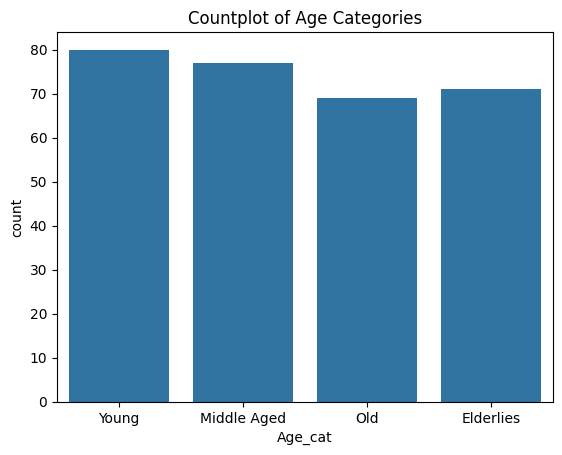

In [15]:
#visualization for the Age_cat column
sns.countplot(x="Age_cat", data=data)
plt.title("Countplot of Age Categories")
plt.show()

#Data Cleaning
The dataset contained 303 rows and 15 columns.


*  -Missing data consisted of around 1.32% of the dataset. So,we dropped them.
*   -The data types were checked for appropriate or not.

*  -Created a new column 'Age_cat' containing the age categories






#Exploratory Data Analysis

In [16]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Elderlies
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Elderlies
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Elderlies
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,Young
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Young


In [17]:
#create categorical column for Sex and Angina by Exercise(ExAng) columns
data['Sex_cat']=np.where(data['Sex']==1, 'Male','Female')
data['ExAng_cat']=np.where(data['ExAng']==1, 'yes','no')

data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Elderlies,Male,no
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Elderlies,Male,yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Elderlies,Male,yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,Young,Male,no
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Young,Female,no


<ipython-input-18-cee56cd5bd0f>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=90)
<ipython-input-18-cee56cd5bd0f>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=90)
<ipython-input-18-cee56cd5bd0f>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=90)
<ipython-input-18-cee56cd5bd0f>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=90)


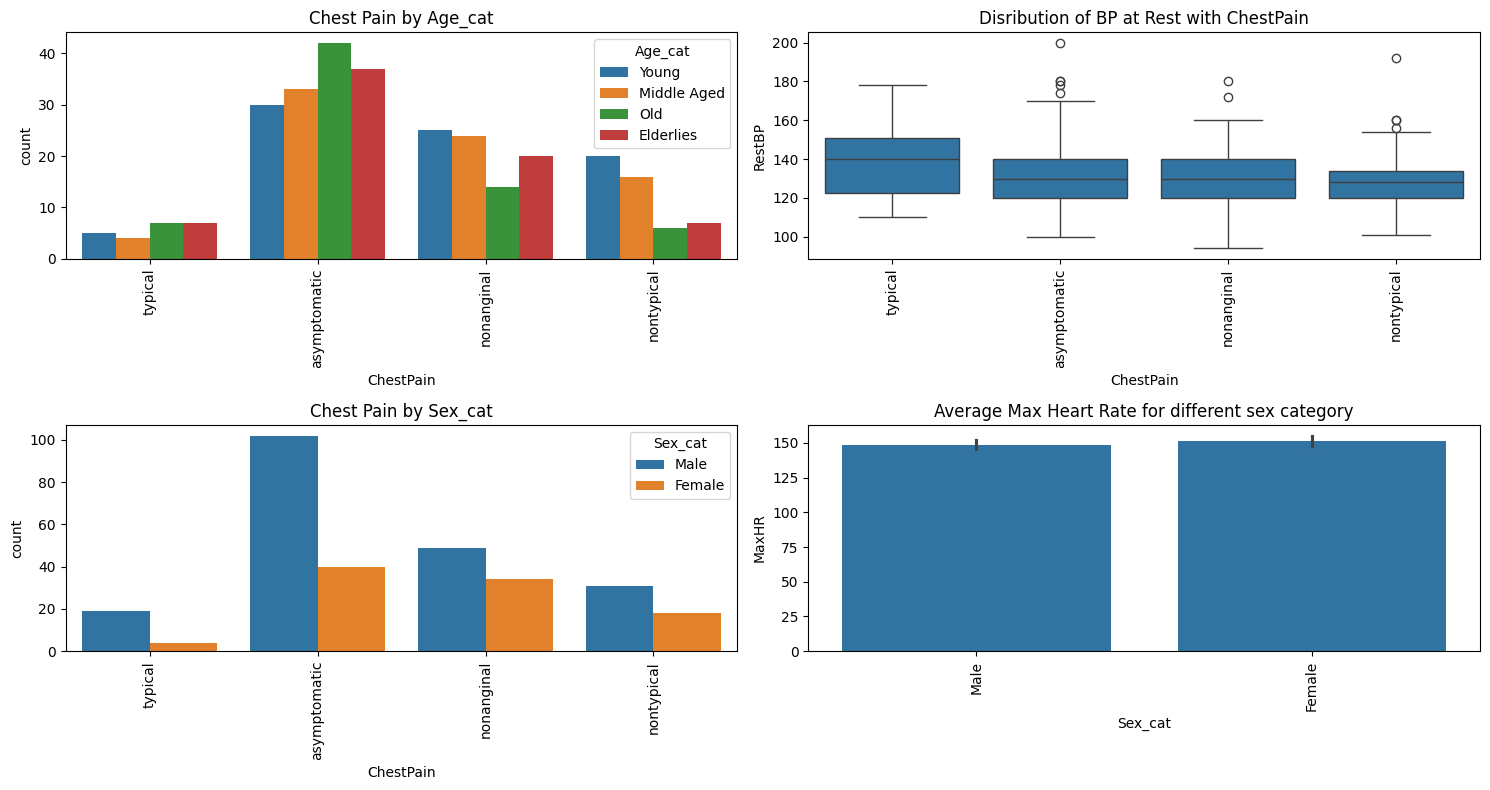

In [18]:
#exploring the various categorical columns

fig,axs=plt.subplots(nrows=2,ncols=2,sharey=False, figsize=(15,8))
fig.subplots_adjust(hspace=1)

g=sns.countplot(x='ChestPain', hue='Age_cat', data=data, ax=axs[0,0])
g.set_title('Chest Pain by Age_cat')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=90)

g=sns.boxplot(x='ChestPain', y='RestBP', data=data, ax=axs[0,1])
g.set_title('Disribution of BP at Rest with ChestPain')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=90)

g=sns.countplot(x='ChestPain', hue='Sex_cat', data=data, ax=axs[1,0])
g.set_title('Chest Pain by Sex_cat')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=90)

g=sns.barplot(y='MaxHR', x='Sex_cat', data=data, ax=axs[1,1])
g.set_title('Average Max Heart Rate for different sex category')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

In [19]:
#Value counting for various age categories for sex
age_cat_count=data[['Sex_cat','Age_cat']].value_counts(normalize=True, sort=True).to_frame()
age_cat_count

proportion
Sex_cat Age_cat                
Male    Young          0.195286
        Middle Aged    0.178451
        Old            0.171717
        Elderlies      0.131313
Female  Elderlies      0.107744
        Middle Aged    0.080808
        Young          0.074074
        Old            0.060606

In [20]:
#Data for the pie chart
sex_age_data={
    ('Male',	'Young'):	0.195286,
    ('Male',	'Middle Aged'):	0.178451,
    ('Male',	'Old'):	0.171717,
    ('Male',	'Elderlies'):	0.131313,
    ('Female',	'Elderlies'):	0.107744,
    ('Female',	'Middle Aged	'):	0.080808,
    ('Female',	'Young'):	0.074074,
    ('Female',	'Old'):	0.060606
}

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


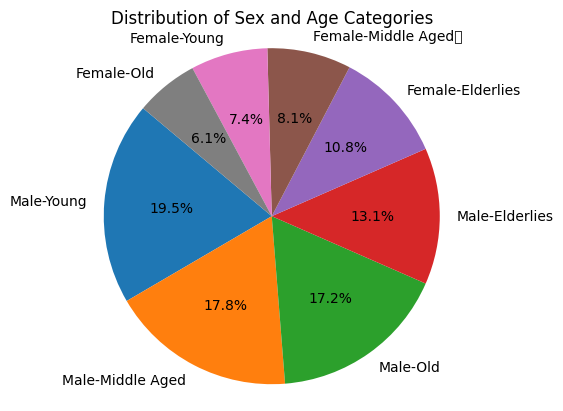

In [21]:
#create a figure and axis
fig,ax=plt.subplots()

#data for the pie chart
labels=[f"{sex}-{age}" for sex, age in sex_age_data.keys()]
sizes=list(sex_age_data.values())

#plot the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

#Aspect ration to make the pie circular
ax.axis('equal')

#Title for the pie chart
plt.title('Distribution of Sex and Age Categories')

plt.show()

In [22]:
#describing the categorical columns
data.describe(exclude=[np.number])

,ChestPain,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
count,297,297,297,297,297,297
unique,4,3,2,4,2,2
top,asymptomatic,normal,No,Young,Male,no
freq,142,164,160,80,201,200


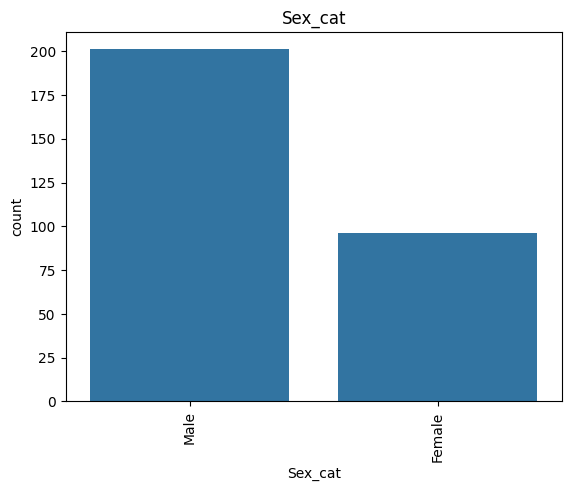

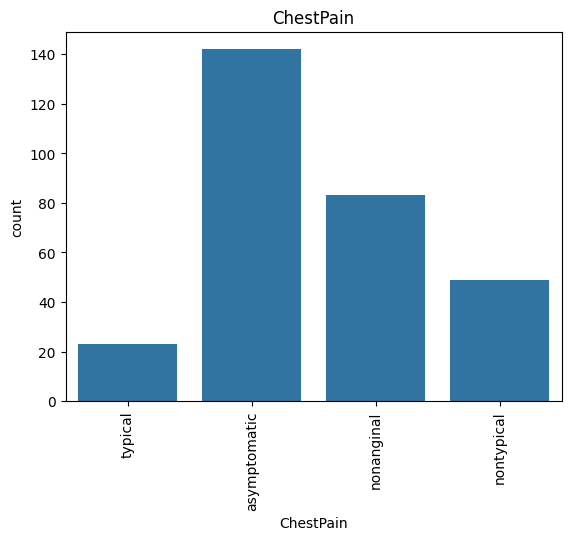

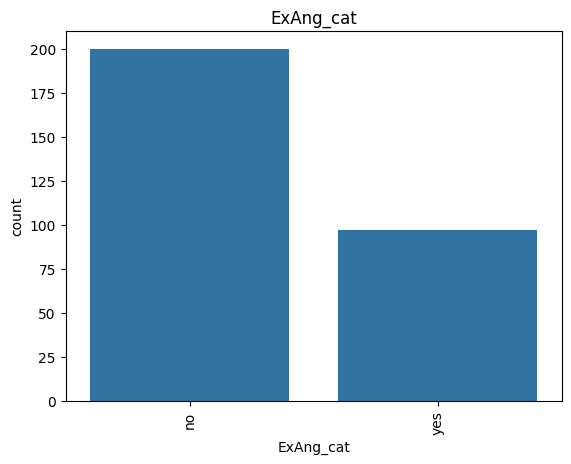

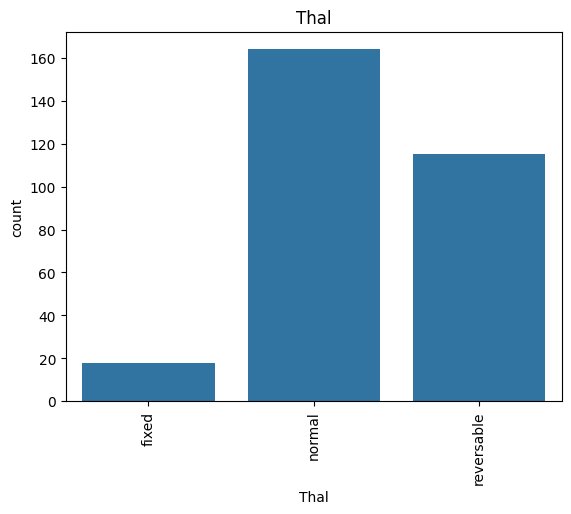

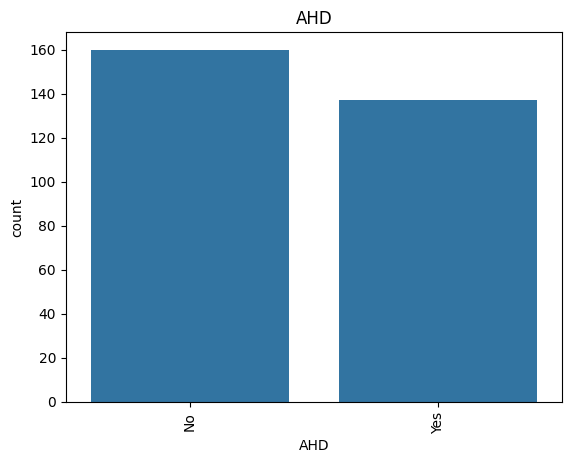

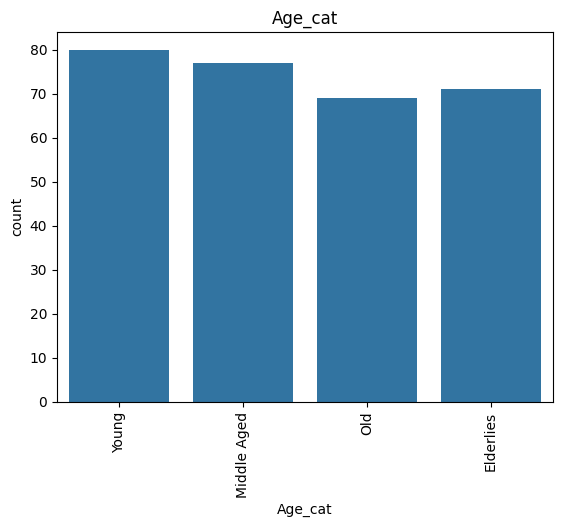

In [23]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns=['Sex_cat','ChestPain','ExAng_cat','Thal','AHD','Age_cat']

def plot_cat_count():
  for c in columns:
    sns.countplot(x=c, data=data)
    plt.title(c)
    plt.xticks(rotation=90)
    plt.show()
plot_cat_count()

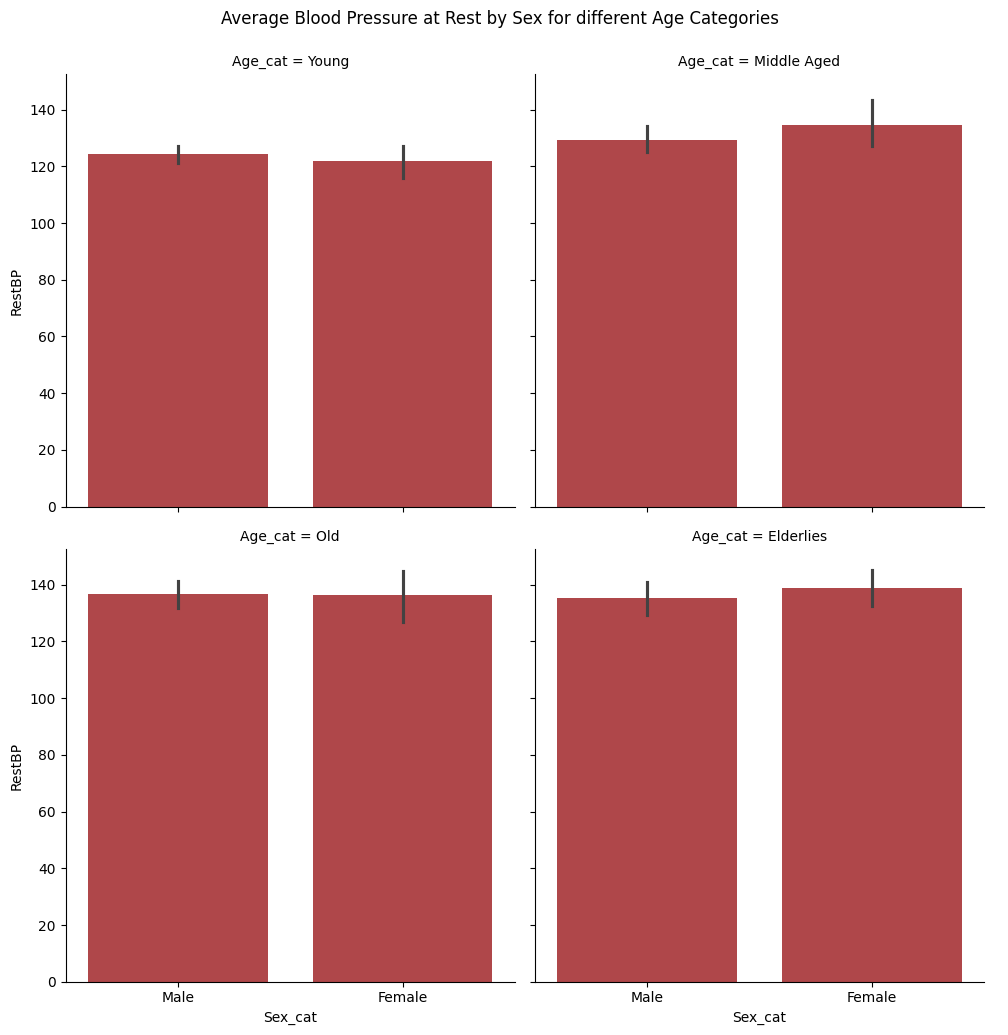

In [24]:
#visualizing the Blood pressure at Rest by Sex for different Age categories
sns.set_palette('RdBu')
g=sns.catplot(x='Sex_cat',y='RestBP', data=data, kind='bar', col='Age_cat',col_wrap=2)
g.fig.suptitle('Average Blood Pressure at Rest by Sex for different Age Categories',y=1.03)
plt.show()

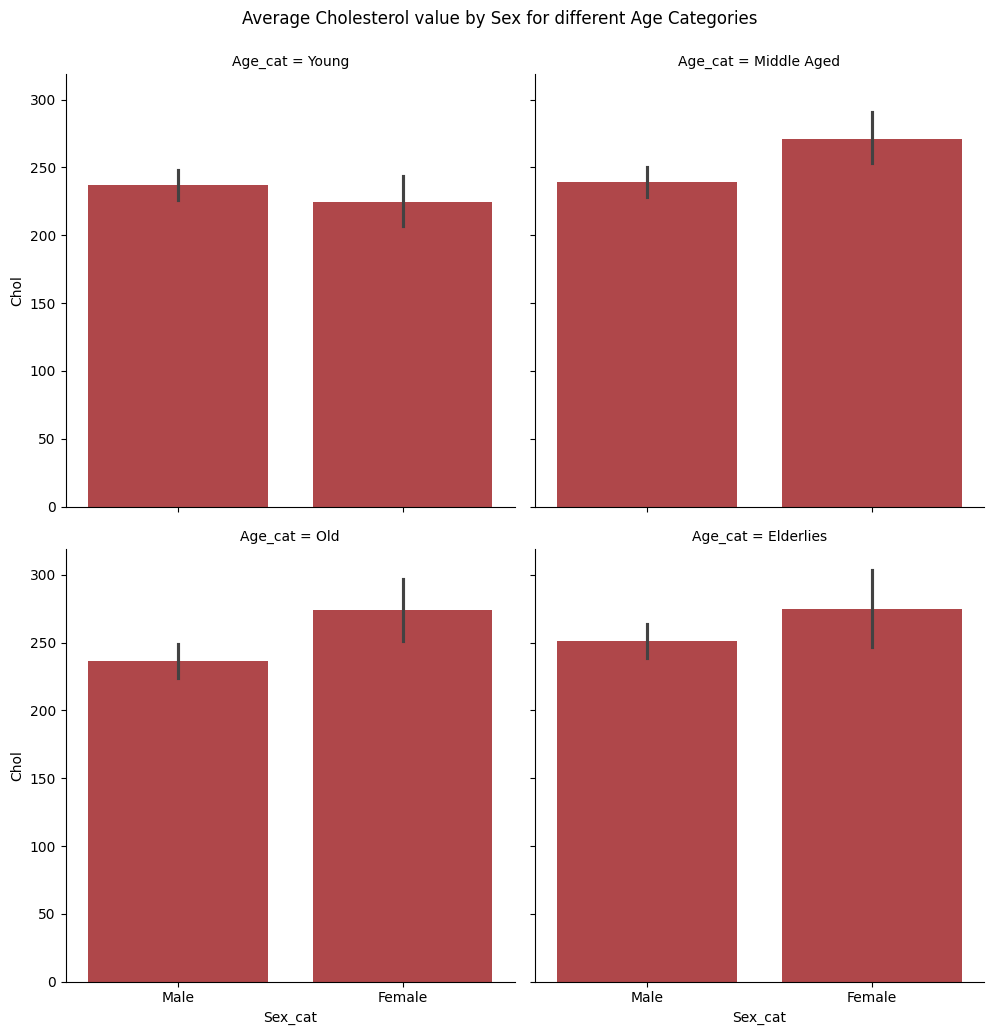

In [25]:
#visualizing the Cholesterol by Sex for different Age categories
sns.set_palette('RdBu')
g=sns.catplot(x='Sex_cat',y='Chol', data=data, kind='bar', col='Age_cat',col_wrap=2)
g.fig.suptitle('Average Cholesterol value by Sex for different Age Categories',y=1.03)
plt.show()

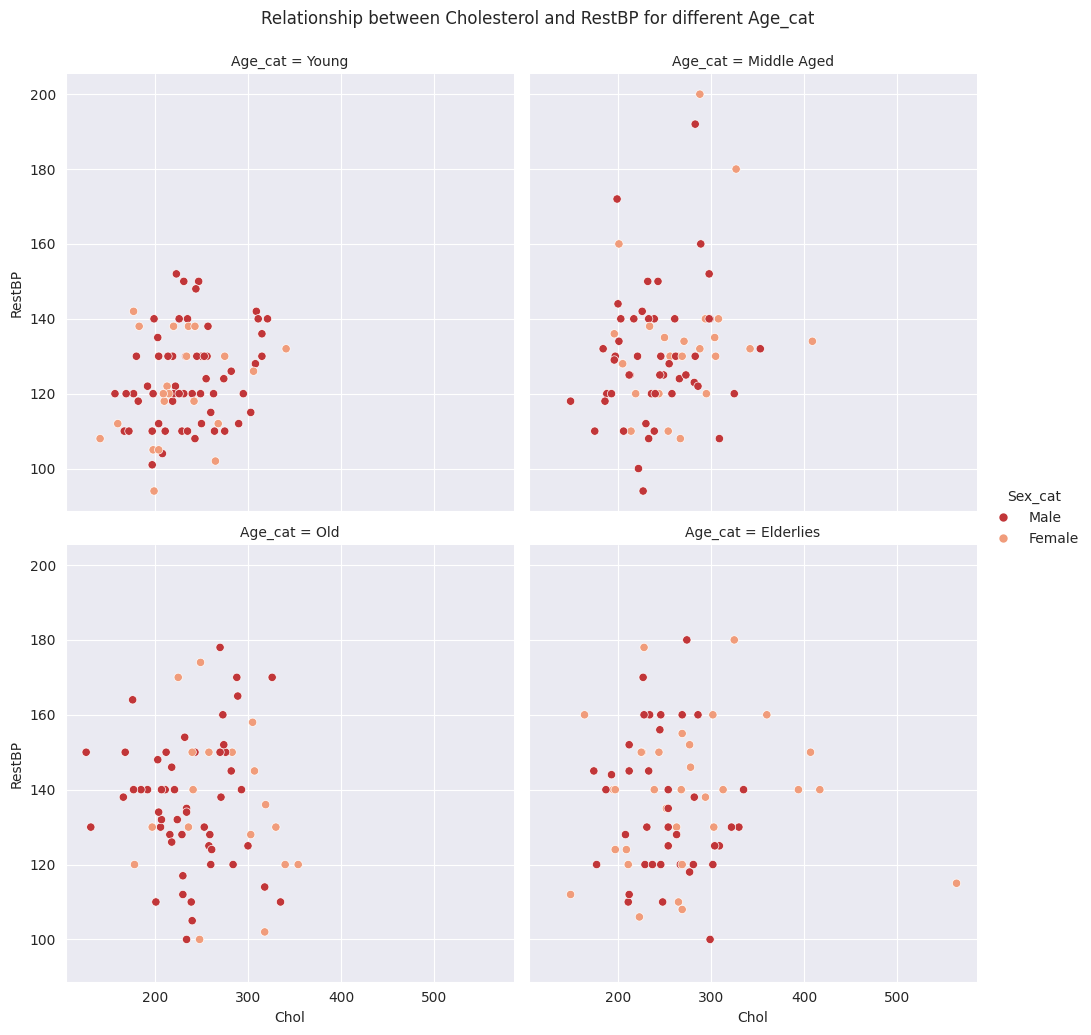

In [26]:
#visualizing RestBP by Chol for the different age categories
sns.set_style('darkgrid')
g=sns.relplot(x='Chol', y='RestBP', data=data, hue='Sex_cat', col='Age_cat', col_wrap=2)
g.fig.suptitle('Relationship between Cholesterol and RestBP for different Age_cat',y=1.03)
plt.show()

From the visualizations above:


*   More people(both male and female) across all age categories experienced asymptomatic angina(chest pain) while few people experienced typical angina.

*  From the distribution of BP at Rest with Angina, it shows that people with high BP had typical angina.



*   Males tend to have Angina than females. Also, most males had asymptomatic angina(Chest pain).

*  The Average Heart Rate of females was slightly higher than that of males


*   On Average, the females BP tend to increase than male

*   On Average, the female Cholesterol value also tend to increase than male.


*  As cholesterol value increased, BP at Rest also tend to increase












#Reveiew and scale the numerical variable if necessary

In [27]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Elderlies,Male,no
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Elderlies,Male,yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Elderlies,Male,yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,Young,Male,no
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Young,Female,no


In [28]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


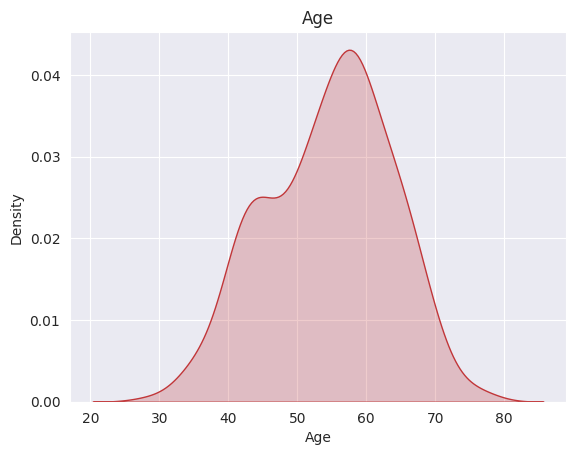

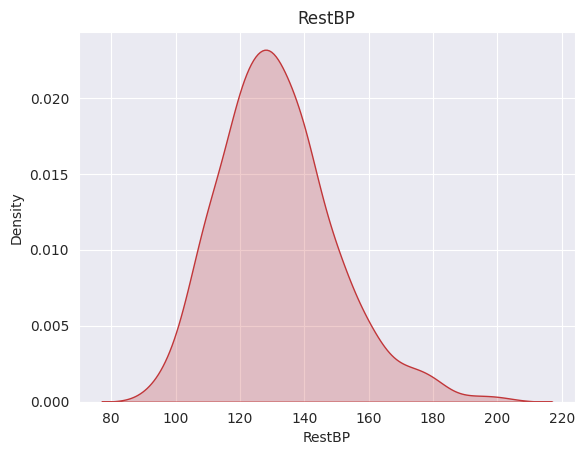

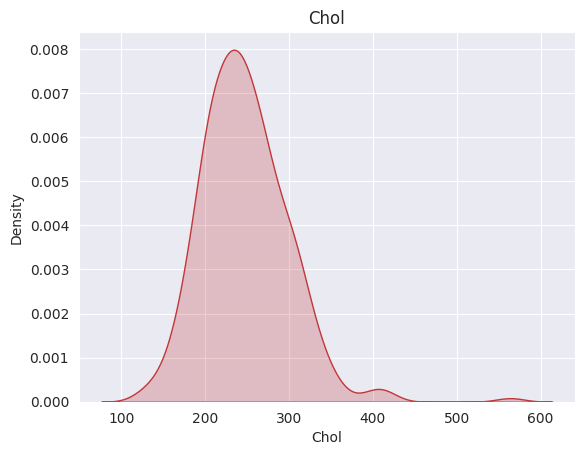

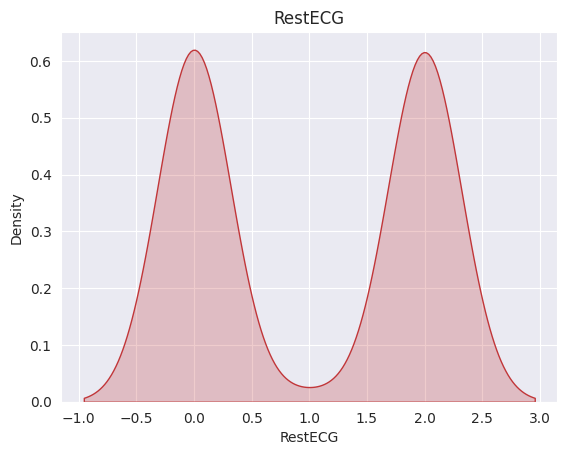

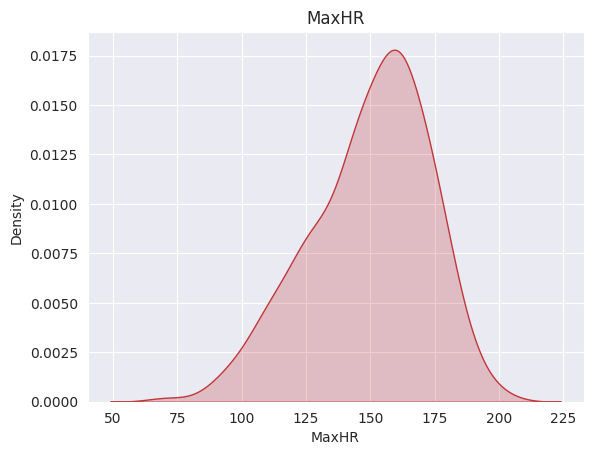

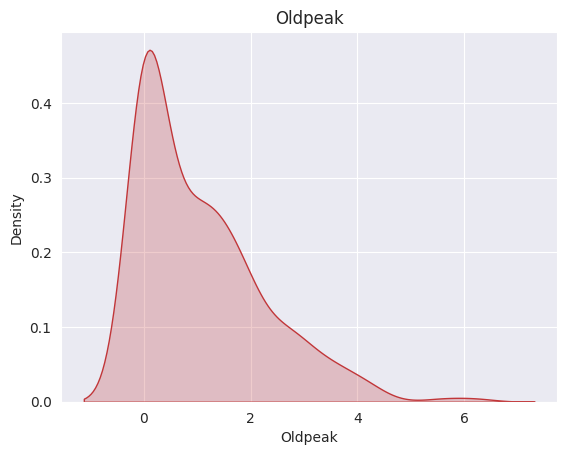

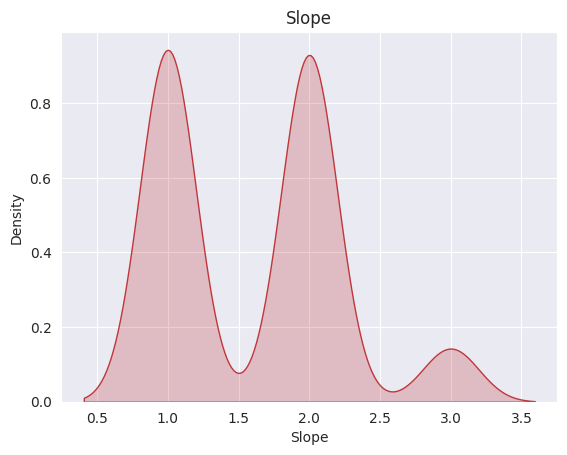

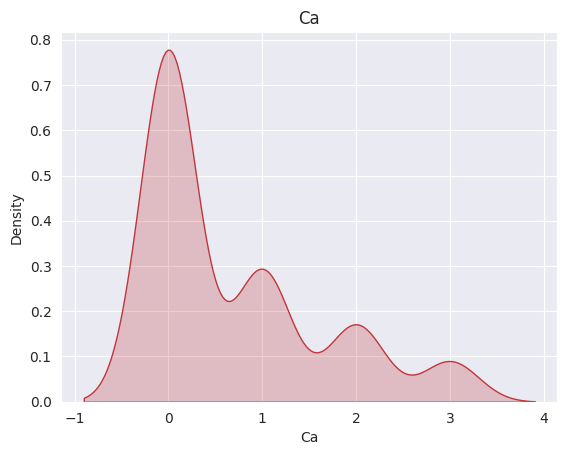

In [30]:
#visualize the information above for easy understanding

columns=['Age','RestBP', 'Chol', 'RestECG','MaxHR','Oldpeak','Slope','Ca']

def plot_dist_count():
  for c in columns:
    sns.kdeplot(data[c], fill=True)
    plt.title(c)
    plt.show()
plot_dist_count()

#Using Normalization to scale variables

In [31]:
#checking for variance
columns=['Age', 'RestBP','Chol','MaxHR','Oldpeak','Ca']
data[columns].var()

,0
Age,81.897716
RestBP,315.517290
Chol,2703.748589
MaxHR,526.315270
Oldpeak,1.359842
Ca,0.881654


In [32]:
#Normalizing to scale the columns with high variance
data[['Age','RestBP','Chol','MaxHR']]=np.log(data[['Age','RestBP','Chol','MaxHR']])

#checking the variance after scaling
columns=['Age', 'RestBP','Chol','MaxHR','Oldpeak','Ca']
data[columns].var()

,0
Age,0.030321
RestBP,0.017376
Chol,0.041665
MaxHR,0.027261
Oldpeak,1.359842
Ca,0.881654


In [33]:
#Using Standardization to scale variables
columns=['Age', 'Sex', 'RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca']

x_val=data[['Age','Sex', 'RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca']].values

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_val)

print(x_scaled)

[[ 0.91318003  0.69109474  0.79806485 ...  1.06896529  2.26414539
  -0.72197605]
 [ 1.26729568  0.69109474  1.54611826 ...  0.38177332  0.6437811
   2.47842525]
 [ 1.26729568  0.69109474 -0.63999913 ...  1.32666228  0.6437811
   1.41162482]
 ...
 [ 1.3525204   0.69109474  0.74547589 ...  2.01385425  0.6437811
   1.41162482]
 [ 0.33744362  0.69109474 -0.03174866 ...  0.12407633  0.6437811
   0.34482438]
 [ 0.33744362 -1.44697961 -0.03174866 ... -0.90671163  0.6437811
   0.34482438]]


In [34]:
#creating the scaled dataframe as df
df=pd.DataFrame(data=x_scaled, columns=columns)
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,0.913180,0.691095,0.798065,-0.190665,2.430427,1.010199,0.094335,-0.696419,1.068965,2.264145,-0.721976
1,1.267296,0.691095,1.546118,0.815113,-0.411450,1.010199,-1.898635,1.435916,0.381773,0.643781,2.478425
2,1.267296,0.691095,-0.639999,-0.275643,-0.411450,1.010199,-0.820678,1.435916,1.326662,0.643781,1.411625
3,-2.148431,0.691095,-0.031749,0.154923,-0.411450,-1.003419,1.431904,-0.696419,2.099753,2.264145,-0.721976
4,-1.557906,-1.446980,-0.031749,-0.842943,-0.411450,1.010199,0.924633,-0.696419,0.295874,-0.976583,-0.721976
...,...,...,...,...,...,...,...,...,...,...,...
292,0.337444,-1.446980,0.531403,-0.025000,-0.411450,-1.003419,-1.109628,1.435916,-0.734914,0.643781,-0.721976
293,-1.022398,0.691095,-1.301205,0.422316,-0.411450,-1.003419,-0.681205,-0.696419,0.124076,0.643781,-0.721976
294,1.352520,0.691095,0.745476,-1.114957,2.430427,-1.003419,-0.281051,-0.696419,2.013854,0.643781,1.411625
295,0.337444,0.691095,-0.031749,-3.016521,-0.411450,-1.003419,-1.517634,1.435916,0.124076,0.643781,0.344824


In [35]:
#checking variance after scaling
df.var()

,0
Age,1.003378
Sex,1.003378
RestBP,1.003378
Chol,1.003378
Fbs,1.003378
RestECG,1.003378
MaxHR,1.003378
ExAng,1.003378
Oldpeak,1.003378
Slope,1.003378


Based on the provided numerical variable information, it appears that some of the variables may benefit from scaling. Variables like 'Age', 'RestBP','Chol','RestECG','MaxHR','Oldpeak','Slope','Ca' have different scales and ranges.
Scaling is typically useful when applying certain machine learning algorithms that are sensitive to the scale of the variables. It helps to ensure that all the variables contribute equally to the model and prevents any bias that may arise due to differences in the scale.
We have done normalization and standardization here.

#Are there categorical variables in the dataset"? Pass them to numbers.

In [36]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
0,4.143135,1,typical,4.976734,5.451038,1,2,5.010635,0,2.3,3,0.0,fixed,No,Elderlies,Male,no
1,4.204693,1,asymptomatic,5.075174,5.655992,0,2,4.682131,1,1.5,2,3.0,normal,Yes,Elderlies,Male,yes
2,4.204693,1,asymptomatic,4.787492,5.433722,0,2,4.859812,1,2.6,2,2.0,reversable,Yes,Elderlies,Male,yes
3,3.610918,1,nonanginal,4.867534,5.521461,0,0,5.231109,0,3.5,3,0.0,normal,No,Young,Male,no
4,3.713572,0,nontypical,4.867534,5.318120,0,2,5.147494,0,1.4,1,0.0,normal,No,Young,Female,no


In [37]:
#dropping unnecessary columns
data.drop(columns=['Sex_cat','ExAng_cat','Age'], inplace=True)

#read data
data.head()

,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat
0,1,typical,4.976734,5.451038,1,2,5.010635,0,2.3,3,0.0,fixed,No,Elderlies
1,1,asymptomatic,5.075174,5.655992,0,2,4.682131,1,1.5,2,3.0,normal,Yes,Elderlies
2,1,asymptomatic,4.787492,5.433722,0,2,4.859812,1,2.6,2,2.0,reversable,Yes,Elderlies
3,1,nonanginal,4.867534,5.521461,0,0,5.231109,0,3.5,3,0.0,normal,No,Young
4,0,nontypical,4.867534,5.318120,0,2,5.147494,0,1.4,1,0.0,normal,No,Young


In [38]:
#to Replace categorical variables to numerical

pd.get_dummies(data)

,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,...,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes,Age_cat_Young,Age_cat_Middle Aged,Age_cat_Old,Age_cat_Elderlies
0,1,4.976734,5.451038,1,2,5.010635,0,2.3,3,0.0,...,True,True,False,False,True,False,False,False,False,True
1,1,5.075174,5.655992,0,2,4.682131,1,1.5,2,3.0,...,False,False,True,False,False,True,False,False,False,True
2,1,4.787492,5.433722,0,2,4.859812,1,2.6,2,2.0,...,False,False,False,True,False,True,False,False,False,True
3,1,4.867534,5.521461,0,0,5.231109,0,3.5,3,0.0,...,False,False,True,False,True,False,True,False,False,False
4,0,4.867534,5.318120,0,2,5.147494,0,1.4,1,0.0,...,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,4.941642,5.484797,0,0,4.812184,1,0.2,2,0.0,...,False,False,False,True,False,True,False,False,True,False
298,1,4.700480,5.575949,0,0,4.882802,0,1.2,2,0.0,...,True,False,False,True,False,True,True,False,False,False
299,1,4.969813,5.262690,1,0,4.948760,0,3.4,2,2.0,...,False,False,False,True,False,True,False,False,False,True
300,1,4.867534,4.875197,0,0,4.744932,1,1.2,2,1.0,...,False,False,False,True,False,True,False,False,True,False


Summary of Heart Dataset Exploration:
The dataset initially contained 303 rows and 15 columns.

Missing datas were dropped resulting into 299 rows and 15 columns.

Introduced a new columns categorizing age.

Angina Distribution: Asymptomatic Angina was more prevalent across all age categories, with fewer instances of typical angina.

Blood Pressure and Angina: Individuals with high blood pressure tended to experience Typical Angina.

Gender Wise Angina: Most males experienced Asymptomatic angina as opposed to females.

Heart Rate Differences: Average heart rate was slightly higher in females than males.

Blood Pressure and Cholesterol: Females had more average blood pressure and cholesterol as compared to males.

Cholesterol and RestBP Relationship: As cholesterol values increased, RestBP increased.

Variable Scaling:Demonstrated the use of both normalization and standardization techniques for scaling.

Transformed Categorical variables into numerical representations.

The ‘Age’ column was dropped to prevent overfitting, considering redundancy with the newly introduced categorical age column.

This exploratory data analysis provides valuable insights into the dataset showcasing patterns, trends and potential relationships.




